In [3]:
import numpy as np
import pandas as pd
import os
from scipy import stats

# Construct the path to the data file in an OS-independent way
data_dir='data'
filename='238 - A Simple Example in Python - 2.01.+Admittance.csv'
# Get the current working directory of the script
current_dir = os.getcwd()

# Construct the path to the data file by going up one level ('..')
# and then into the 'data' folder.
file_path = os.path.join(current_dir, '..', '..', data_dir, filename)

# Normalize the path to resolve '..' and get the absolute path
file_path = os.path.abspath(file_path)

df = pd.read_csv(file_path) # đọc file csv với dấu chấm phẩy để ngăn cách các field và dấu phẩy thập phân
display(df)
df.info()  # hiển thị thông tin về dataframe
df.describe()  # hiển thị thống kê mô tả của dataframe

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SAT       168 non-null    int64 
 1   Admitted  168 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


,SAT
count,168.000000
mean,1695.273810
std,183.019017
min,1334.000000
25%,1547.500000
50%,1691.500000
75%,1844.500000
max,2050.000000


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import os


df['Admitted'] = df['Admitted'].map({'Yes': 1, 'No': 0})

# Xác định ma trận đặc trưng (X) và vector mục tiêu (y)
# Ở đây, chúng ta chỉ sử dụng điểm 'SAT' làm đặc trưng.
X = df[['SAT']]
y = df['Admitted']

# Chia dữ liệu thành hai bộ: huấn luyện (train) và kiểm tra (test)
# 80% dữ liệu sẽ dùng để huấn luyện, 20% còn lại dùng để kiểm tra.
# random_state=42 để đảm bảo kết quả chia luôn giống nhau mỗi lần chạy.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo một đối tượng (instance) của mô hình Hồi quy Logistic
log_reg = LogisticRegression()

# Huấn luyện (train) mô hình trên dữ liệu huấn luyện
# Hàm fit() sẽ tìm ra các hệ số tối ưu cho mô hình.
log_reg.fit(X_train, y_train)

# Sử dụng mô hình đã được huấn luyện để đưa ra dự đoán trên bộ dữ liệu kiểm tra
y_pred = log_reg.predict(X_test)

# Đánh giá hiệu suất của mô hình
# So sánh kết quả dự đoán (y_pred) với kết quả thực tế (y_test).
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Độ chính xác của mô hình hồi quy logistic: {accuracy:.4f}')

# Bạn cũng có thể xem các tham số của mô hình
# Intercept là hệ số chặn (còn gọi là bias)
print(f'Hệ số chặn (Intercept): {log_reg.intercept_[0]}')
# Coefficient là hệ số của đặc trưng 'SAT'
print(f'Hệ số (Coefficient) cho SAT: {log_reg.coef_[0][0]}')

# Để dự đoán cho một điểm SAT mới, ví dụ 1700
# Dữ liệu đầu vào cho predict() phải là một mảng 2D.
new_sat_score = [[1700]]
prediction = log_reg.predict(new_sat_score)
print(f'Dự đoán cho điểm SAT 1700: {"Được nhận" if prediction[0] == 1 else "Không được nhận"}')

Độ chính xác của mô hình hồi quy logistic: 0.9118
Hệ số chặn (Intercept): -68.8569223299883
Hệ số (Coefficient) cho SAT: 0.04129622459237118
Dự đoán cho điểm SAT 1700: Được nhận


d:\HocPython\AI-Engineer-Course\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


d:\HocPython\AI-Engineer-Course\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


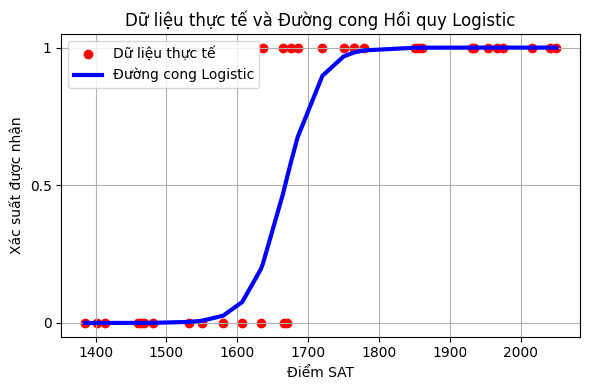

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# --- Biểu đồ 1: Scatter plot trực tiếp của y_test vs y_pred ---
# Biểu đồ này sẽ chỉ hiển thị các điểm ở các góc, thể hiện các trường hợp:
# (0,0): Dự đoán đúng (Không được nhận)
# (1,1): Dự đoán đúng (Được nhận)
# (0,1): Dự đoán sai (Thực tế là Không, dự đoán là Có)
# (1,0): Dự đoán sai (Thực tế là Có, dự đoán là Không)

plt.figure(figsize=(6, 4))



# --- Biểu đồ 2: Dữ liệu thực tế và đường cong hồi quy Logistic ---
# Đây là cách trực quan hóa tốt hơn cho mô hình logistic.
# plt.subplot(1, 2, 2)

# Vẽ các điểm dữ liệu của bộ test
plt.scatter(X_test, y_test, color='red', label='Dữ liệu thực tế')

# Sắp xếp X_test để vẽ đường cong mượt mà
X_test_sorted = np.sort(X_test, axis=0)

# Tính toán xác suất dự đoán cho các giá trị X đã sắp xếp
# predict_proba trả về xác suất cho cả hai lớp [0, 1]
# Chúng ta lấy cột thứ hai (index 1) là xác suất của lớp '1' (Được nhận)
y_proba = log_reg.predict_proba(X_test_sorted)[:, 1]

# Vẽ đường cong hồi quy logistic
plt.plot(X_test_sorted, y_proba, color='blue', linewidth=3, label='Đường cong Logistic')

plt.xlabel("Điểm SAT")
plt.ylabel("Xác suất được nhận")
plt.title("Dữ liệu thực tế và Đường cong Hồi quy Logistic")
plt.yticks([0, 0.5, 1], ["0", "0.5", "1"])
plt.legend()
plt.grid(True)

plt.tight_layout() # Tự động điều chỉnh các subplot cho vừa vặn
plt.show()

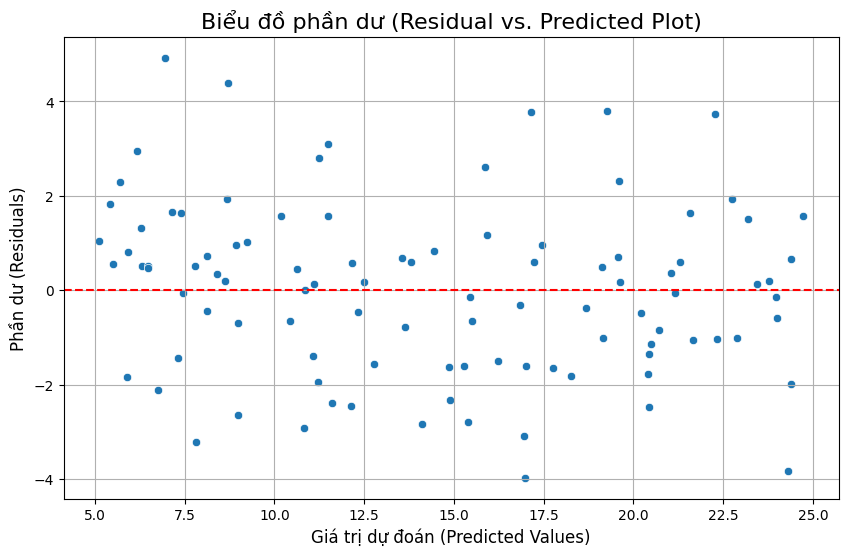

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# --- Bắt đầu vẽ biểu đồ ---

# 1. Tính toán phần dư (residuals)
# Phần dư = Giá trị thực tế - Giá trị dự đoán
residuals = y_test - y_pred

# 2. Vẽ biểu đồ Residual vs. Predicted
plt.figure(figsize=(10, 6))

# Sử dụng scatterplot để vẽ các giá trị dự đoán trên trục hoành 
# và phần dư trên trục tung.
sns.scatterplot(x=y_pred, y=residuals)

# Thêm một đường ngang tại y=0 (đường zero residual) để dễ dàng quan sát
plt.axhline(y=0, color='r', linestyle='--')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Biểu đồ phần dư (Residual vs. Predicted Plot)', fontsize=16)
plt.xlabel('Giá trị dự đoán (Predicted Values)', fontsize=12)
plt.ylabel('Phần dư (Residuals)', fontsize=12)
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

Cách diễn giải biểu đồ:
Mục tiêu lý tưởng là các điểm phần dư phân bố hoàn toàn ngẫu nhiên xung quanh đường ngang màu đỏ (y=0), không tạo ra bất kỳ hình dạng có thể nhận biết nào.

Kiểm tra tính tuyến tính (Linearity):

Tốt (Tuyến tính): Các điểm phân bố ngẫu nhiên. Điều này cho thấy mối quan hệ giữa các biến độc lập và biến phụ thuộc là tuyến tính, và mô hình đã nắm bắt được nó.
Xấu (Phi tuyến): Các điểm tạo thành một đường cong (ví dụ: hình chữ U hoặc U ngược). Điều này có nghĩa là mô hình của bạn đang bỏ lỡ một mối quan hệ phi tuyến trong dữ liệu. Bạn có thể cần thêm các biến bậc cao (như x²) hoặc sử dụng một mô hình khác phức tạp hơn.
Kiểm tra phương sai không đổi (Homoscedasticity) vs. Phương sai thay đổi (Heteroscedasticity):

Tốt (Homoscedasticity): Độ phân tán (độ rộng) của các điểm là như nhau dọc theo trục hoành. Điều này có nghĩa là sai số của mô hình là nhất quán trên tất cả các giá trị dự đoán.
Xấu (Heteroscedasticity): Độ phân tán của các điểm thay đổi khi giá trị dự đoán thay đổi. Dấu hiệu phổ biến nhất là các điểm loe ra như hình cái phễu. Điều này có nghĩa là mô hình của bạn dự đoán tốt hơn ở một số phạm vi giá trị so với các phạm vi khác, vi phạm một trong các giả định quan trọng của hồi quy tuyến tính.

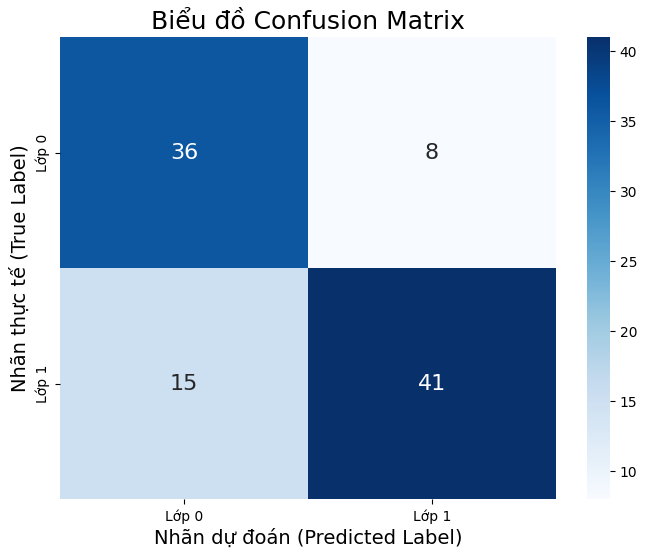

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# --- Giả sử bạn đã có y_test và y_pred từ mô hình phân loại ---
# y_test: nhãn thực tế (True labels)
# y_pred: nhãn dự đoán bởi mô hình (Predicted labels)
#
# LƯU Ý: Bạn cần thay thế các dòng dữ liệu giả định dưới đây 
# bằng y_test và y_pred thực tế từ mô hình của bạn.
# Ví dụ: y_pred = your_classification_model.predict(X_test)

# Dữ liệu giả định để chạy ví dụ (cho bài toán 2 lớp: 0 và 1)
np.random.seed(42)
y_test = np.random.randint(0, 2, size=100)
# Tạo ra y_pred có một chút liên quan đến y_test để ma trận không quá ngẫu nhiên
y_pred = y_test.copy()
# Thêm một vài lỗi dự đoán ngẫu nhiên
for i in range(25):
    idx = np.random.randint(0, 100)
    y_pred[idx] = 1 - y_pred[idx]


# --- Bắt đầu vẽ biểu đồ ---

# 1. Tính toán Confusion Matrix
# Hàm này trả về một ma trận numpy, ví dụ: [[TN, FP], [FN, TP]]
cm = confusion_matrix(y_test, y_pred)

# Lấy tên các lớp (classes) nếu có, ví dụ: ['Class 0', 'Class 1']
# Nếu y của bạn là 0 và 1, bạn có thể đặt tên thủ công như dưới đây.
class_names = ['Lớp 0', 'Lớp 1']

# 2. Vẽ biểu đồ heatmap cho Confusion Matrix
plt.figure(figsize=(8, 6))

# annot=True: hiển thị số liệu trong từng ô
# fmt='d': định dạng số liệu là số nguyên
# cmap='Blues': sử dụng thang màu xanh dương
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names,
            annot_kws={"size": 16}) # Tăng kích thước chữ số trong ô

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ Confusion Matrix', fontsize=18)
plt.ylabel('Nhãn thực tế (True Label)', fontsize=14)
plt.xlabel('Nhãn dự đoán (Predicted Label)', fontsize=14)

# Hiển thị biểu đồ
plt.show()

Cách đọc các giá trị trong ma trận:
Giả sử bài toán có 2 lớp (Lớp 0 và Lớp 1):

Góc trên bên trái (True Negative - TN): Số lần mô hình dự đoán đúng là Lớp 0.
Góc trên bên phải (False Positive - FP): Số lần mô hình dự đoán sai là Lớp 1 (trong khi thực tế là Lớp 0). Đây là lỗi "Type I error".
Góc dưới bên trái (False Negative - FN): Số lần mô hình dự đoán sai là Lớp 0 (trong khi thực tế là Lớp 1). Đây là lỗi "Type II error".
Góc dưới bên phải (True Positive - TP): Số lần mô hình dự đoán đúng là Lớp 1.
Tóm lại:

Đường chéo chính (từ trên trái xuống dưới phải) là tổng số các dự đoán đúng.
Các ô còn lại là tổng số các dự đoán sai.
Mô hình càng tốt khi các giá trị trên đường chéo chính càng lớn và các giá trị ở các ô còn lại càng nhỏ.